In [21]:
import rasterio as rio
import numpy as np
from matplotlib import pyplot as plt
import rasterio.plot
import os

In [4]:
dem = rio.open('dem30m.tif')

In [11]:
# get metadata
dem.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 1777,
 'height': 1684,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:32611'),
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
        0.0, -29.999999999999723, 4229820.934460746)}

In [13]:
# get a specific part of the metadata
dem.crs

CRS.from_dict(init='epsg:32611')

In [6]:
# what type of file is this?
type (dem)

rasterio.io.DatasetReader

In [5]:
# dem is only 1 band as compared to RGB which is multiple bands
dem.read(1)

<open DatasetReader name='dem30m.tif' mode='r'>

In [7]:
elevation = dem.read(1)

In [10]:
elevation

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

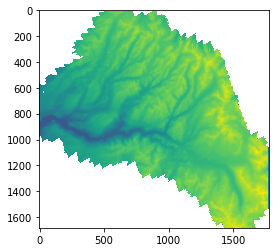

In [17]:
# name of figure, name of the first axis 
fig, ax = plt.subplots()
# image show
ax. imshow(elevation)

In [18]:
depth_20140323 = rio.open('TB20140323_SUPERsnow_depth.tif_mean30m.tif')

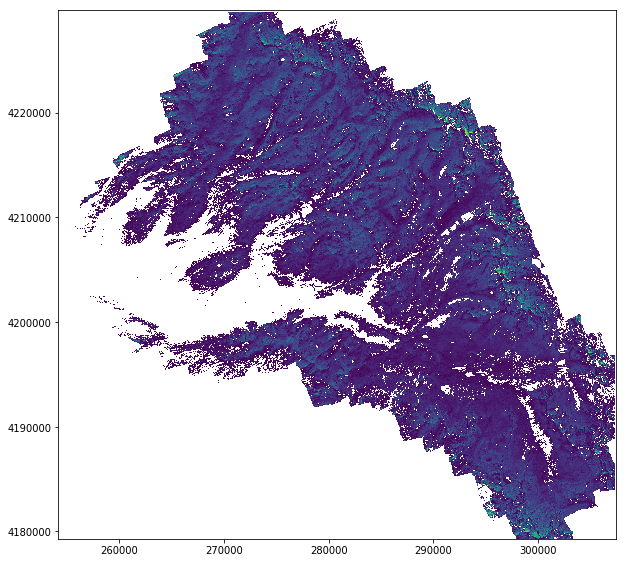

In [22]:
fig, ax = plt.subplots(figsize=(10,10))
rio.plot.show(depth_20140323)

In [23]:
mask = rio.open('scene_30m_mask.tif')

In [25]:
depth_20140323.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': None,
 'width': 1777,
 'height': 1684,
 'count': 1,
 'crs': CRS.from_dict(init='epsg:32611'),
 'transform': Affine(29.999999999999705, 0.0, 254150.4675894332,
        0.0, -29.999999999999723, 4229820.934460746)}

In [26]:
masked_array = mask.read(1)
snow_depth = depth_20140323.read(1) 

In [27]:
masked_snowdepth = masked_array * snow_depth

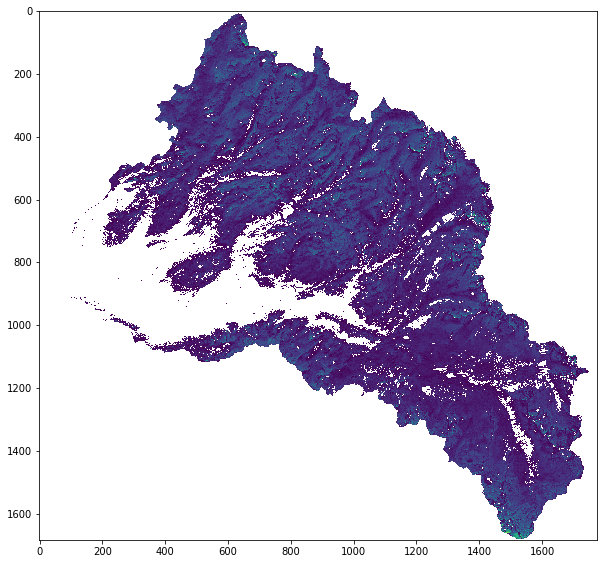

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
rio.plot.show(masked_snowdepth)

In [30]:
# Open and write to this new file
with rio.open('masked_snowdepth.tif',
             'w',
             driver='GTiff',
             height=masked_snowdepth.shape[0],
             width=masked_snowdepth.shape[1],
             count=1,
             dtype=masked_snowdepth.dtype,
             nodata=-9999,
             crs=depth_20140323.crs,
             transform=depth_20140323.transform) as dst:

    dst.write(masked_snowdepth, 1)

In [44]:
# write a function to make masks over a time series of raster files

def masker(geotiff, mask):
    geotiffdata = rio.open(geotiff)
    geotiff_array = geotiffdata.read(1)
    masked_geotiff = geotiff_array * mask
    with rio.open(geotiff[:-4] + 'masked.tif',
             'w',
             driver='GTiff',
             height=geotiff_array.shape[0],
             width=geotiff_array.shape[1],
             count=1,
             dtype=masked_geotiff.dtype,
             nodata=-9999,
             crs=geotiffdata.crs,
             transform=geotiffdata.transform) as dst:

        dst.write(masked_geotiff, 1)
    return None

SyntaxError: unexpected character after line continuation character (<ipython-input-44-7ba46055362e>, line 7)

In [42]:
mask = rio.open('scene_30m_mask.tif')
masked_array = mask.read(1)
masker('TB20140323_SUPERsnow_depth.tif_mean30m.tif', masked_array)

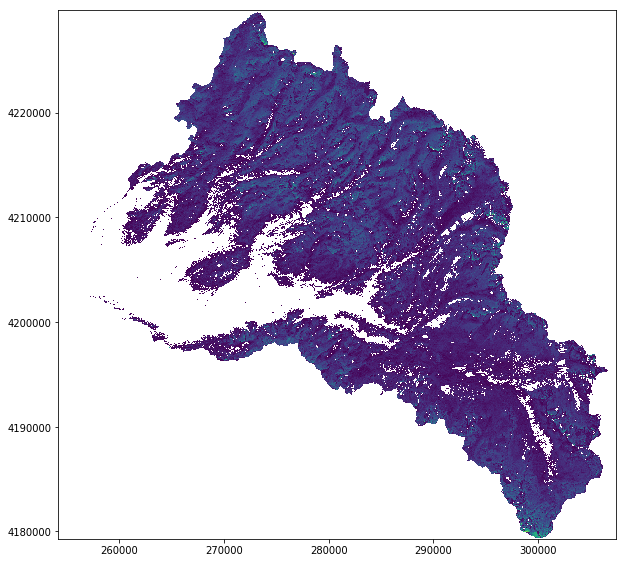

In [43]:
folder = r'C:/Users/lisa/Git/whw2019_snowmelt/ASO/'
for _,_,filenames in os.walk(folder):
    for file in filenames:
        fileExt=os.path.splitext(file)[-1]
        if fileExt == '.tif':
            masker(folder + file, masked_array)

RasterioIOError: C:/Users/lisa/Git/whw2019_snowmelt/ASO/maskedTB20140323_SUPERsnow_depth.tif_mean30m.tif: No such file or directory